In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [8]:
from scipy.interpolate import interp1d

In [3]:
np.pi

3.141592653589793

In [4]:
np.random.random(10)

array([0.40513135, 0.60122656, 0.55297343, 0.39535274, 0.2117244 ,
       0.47032695, 0.26406776, 0.72985698, 0.3246311 , 0.06731765])

In [1]:
data = [[1,2,3],[4,5,6]]

In [4]:
np.sum(data, axis=0)

array([5, 7, 9])

In [5]:
np.sum(data, axis=1)

array([ 6, 15])

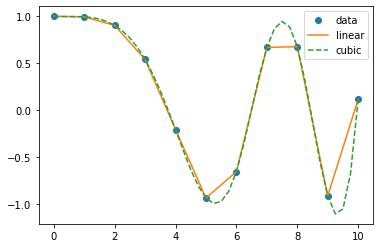

In [9]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [11]:
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [12]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [15]:
np.sum(yinv)

(4.5+0j)

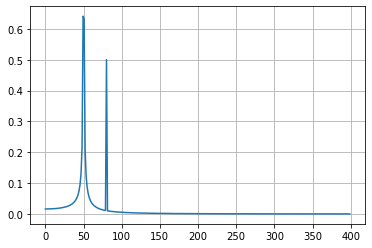

In [16]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [1]:
from scipy import signal, misc

image = misc.face(gray=True).astype(np.float32)
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0)
deriv = (signal.sepfir2d(ck, derfilt, [1]) +
         signal.sepfir2d(ck, [1], derfilt))

In [2]:
laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=np.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')

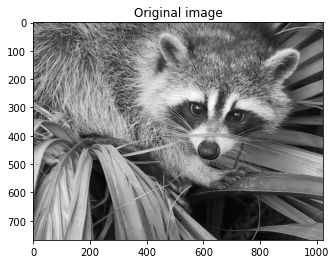

In [6]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

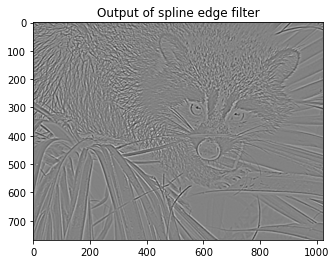

In [5]:
plt.figure()
# plt.imshow(deriv)
plt.imshow(deriv2)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

In [7]:
image = misc.face(gray=True)
w = np.zeros((50, 50))
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(image, w)

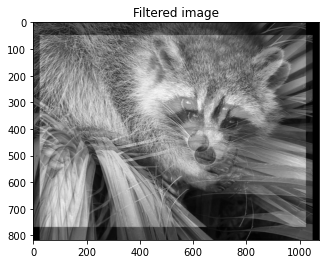

In [8]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

In [13]:
image = misc.ascent()
w = signal.windows.gaussian(51, 10.0)
image_new = signal.sepfir2d(image, w, w)

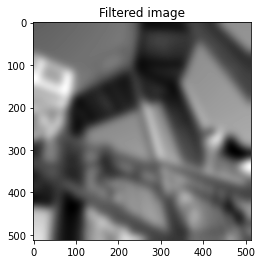

In [14]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

In [32]:
from os.path import dirname, join as pjoin, expanduser
from scipy.io import wavfile
import scipy.io

In [71]:
data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
# wav_fname = pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-be.wav')
# wav_fname = pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-le.wav')
# wav_fname = pjoin(data_dir, 'test-44100Hz-le-1ch-4bytes.wav')
# wav_fname = pjoin(data_dir, 'test-44100Hz-be-1ch-4bytes.wav')
# wav_fname = pjoin(data_dir, 'test-8000Hz-le-2ch-1byteu.wav')
# wav_fname = pjoin(data_dir, 'test-8000Hz-le-4ch-9S-12bit.wav')
wav_fname = pjoin(data_dir, 'test-8000Hz-le-5ch-9S-5bit.wav')

# wav_fname = expanduser('~/Music/Hummingbird.wav')

In [72]:
samplerate, data = wavfile.read(wav_fname)
print(samplerate)
print(data.shape)

8000
(9, 5)


In [73]:
# data = data[int(0.3*44100):3*44100]

In [74]:
channels = len(data.shape)>1 and data.shape[1] or 1
print(f"number of channels = {channels}")
length = data.shape[0] / samplerate
print(f"length = {length}s")
print(data[:10])

number of channels = 5
length = 0.001125s
[[128 128 128 128 128]
 [216 248 216 128 176]
 [248 128   0 128 216]
 [216   0 216 128 240]
 [128 128 128 128 248]
 [ 32 248  32 128 240]
 [  0 128 248 128 216]
 [ 32   0  32 128 176]
 [128 128 128 128 128]]


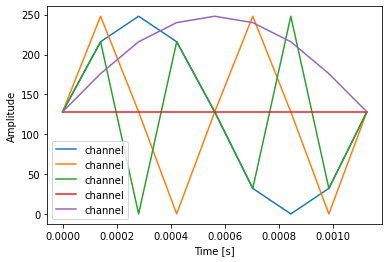

In [75]:
time = np.linspace(0., length, data.shape[0])
if channels == 2:
    plt.plot(time, data[:, 0], label="Left channel")
    plt.plot(time, data[:, 1], label="Right channel")
else:
    plt.plot(time, data[:], label="channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [20]:
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))

In [4]:
word_list = open('/usr/share/dict/words').readlines()

In [6]:
word_list = map(str.strip, word_list)

In [7]:
word_list = [word for word in word_list if len(word) == 3]

In [9]:
word_list = [word for word in word_list if word[0].islower()]

In [11]:
word_list = [word for word in word_list if word.isalpha()]

In [13]:
word_list = list(map(str.lower, word_list))

In [15]:
len(word_list)

1135

In [17]:
word_list = np.asarray(word_list)

In [18]:
word_list.dtype

dtype('<U3')

In [19]:
word_list.sort()

In [20]:
word_bytes = np.ndarray((word_list.size, word_list.itemsize),
                        dtype='uint8',
                        buffer=word_list.data)

In [22]:
word_bytes = word_bytes[:, ::word_list.itemsize//3]

In [24]:
word_bytes.shape

(1135, 3)

In [26]:
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
hamming_dist = pdist(word_bytes, metric='hamming')
# there are three characters in each word
graph = csr_matrix(squareform(hamming_dist < 1.5 / 3))

In [27]:
graph

<1135x1135 sparse matrix of type '<class 'numpy.bool_'>'
	with 20748 stored elements in Compressed Sparse Row format>

In [28]:
i1 = word_list.searchsorted('ape')

In [29]:
i2 = word_list.searchsorted('man')

In [30]:
word_list[i1]

'ape'

In [31]:
word_list[i2]

'man'

In [32]:
from scipy.sparse.csgraph import dijkstra
distances, predecessors = dijkstra(graph, indices=i1,
                                   return_predecessors=True)
print(distances[i2])

5.0


In [38]:
>>> path = []
>>> i = i2
>>> while i != i1:
...     path.append(word_list[i])
...     i = predecessors[i]
>>> path.append(word_list[i1])
>>> print(path[::-1])

['ape', 'ope', 'opt', 'oat', 'mat', 'man']


In [39]:
path

['man', 'mat', 'oat', 'opt', 'ope', 'ape']

In [40]:
>>> from scipy.sparse.csgraph import connected_components
>>> N_components, component_list = connected_components(graph)
>>> print(N_components)

4


In [41]:
[np.sum(component_list == i) for i in range(N_components)]

[1132, 1, 1, 1]

In [42]:
[list(word_list[np.nonzero(component_list == i)]) for i in range(1, N_components)]

[['edh'], ['its'], ['nth']]

In [43]:
>>> distances, predecessors = dijkstra(graph, return_predecessors=True)
>>> max_distance = np.max(distances[~np.isinf(distances)])
>>> print(max_distance)

8.0


In [44]:
>>> i1, i2 = np.nonzero(distances == max_distance)
>>> list(zip(word_list[i1], word_list[i2]))

[('cwm', 'upo'),
 ('gnu', 'icy'),
 ('gnu', 'ump'),
 ('gnu', 'upo'),
 ('hei', 'upo'),
 ('hen', 'upo'),
 ('hep', 'upo'),
 ('hew', 'upo'),
 ('hex', 'upo'),
 ('hub', 'upo'),
 ('hug', 'upo'),
 ('hup', 'upo'),
 ('hyp', 'upo'),
 ('icy', 'gnu'),
 ('imp', 'mux'),
 ('imp', 'quo'),
 ('imp', 'yus'),
 ('imu', 'yus'),
 ('jet', 'upo'),
 ('jug', 'upo'),
 ('jut', 'upo'),
 ('keb', 'upo'),
 ('kef', 'upo'),
 ('keg', 'upo'),
 ('ken', 'upo'),
 ('kep', 'upo'),
 ('kex', 'upo'),
 ('mux', 'imp'),
 ('nun', 'upo'),
 ('our', 'upo'),
 ('peg', 'upo'),
 ('pen', 'upo'),
 ('pep', 'upo'),
 ('pew', 'upo'),
 ('pub', 'upo'),
 ('pug', 'upo'),
 ('pun', 'upo'),
 ('pup', 'upo'),
 ('pus', 'upo'),
 ('pya', 'upo'),
 ('pyx', 'upo'),
 ('quo', 'imp'),
 ('quo', 'upo'),
 ('ssu', 'upo'),
 ('uji', 'upo'),
 ('ump', 'gnu'),
 ('upo', 'cwm'),
 ('upo', 'gnu'),
 ('upo', 'hei'),
 ('upo', 'hen'),
 ('upo', 'hep'),
 ('upo', 'hew'),
 ('upo', 'hex'),
 ('upo', 'hub'),
 ('upo', 'hug'),
 ('upo', 'hup'),
 ('upo', 'hyp'),
 ('upo', 'jet'),
 ('upo', 'jug'

In [45]:
>>> path = []
>>> i = i2[0]
>>> while i != i1[0]:
...     path.append(word_list[i])
...     i = predecessors[i1[0], i]
>>> path.append(word_list[i1[0]])
>>> print(path[::-1])

['cwm', 'cam', 'cay', 'cry', 'ary', 'ady', 'ado', 'udo', 'upo']


In [47]:
1/1.6180339887498948482

0.6180339887498948

In [44]:
df = pd.DataFrame(
   ...:     [
   ...:         ("bird", "Falconiformes", 389.0),
   ...:         ("bird", "Psittaciformes", 24.0),
   ...:         ("mammal", "Carnivora", 80.2),
   ...:         ("mammal", "Primates", np.nan),
   ...:         ("mammal", "Carnivora", 58),
   ...:     ],
   ...:     index=["falcon", "parrot", "lion", "monkey", "leopard"],
   ...:     columns=("class", "order", "max_speed"),
   ...: )

In [45]:
df['nc'] = 1

In [46]:
df

,class,order,max_speed,nc
falcon,bird,Falconiformes,389.0,1
parrot,bird,Psittaciformes,24.0,1
lion,mammal,Carnivora,80.2,1
monkey,mammal,Primates,NaN,1
leopard,mammal,Carnivora,58.0,1


In [47]:
grouped = df.groupby("class")

In [48]:
grouped.sum()

,max_speed,nc
class,,
bird,413.0,2
mammal,138.2,3


In [49]:
for name, group in grouped:
    print(name)
    # print(group)
    group['nc'] = group['nc'].cumsum()
    print(group)

bird
       class           order  max_speed  nc
falcon  bird   Falconiformes      389.0   1
parrot  bird  Psittaciformes       24.0   2
mammal
          class      order  max_speed  nc
lion     mammal  Carnivora       80.2   1
monkey   mammal   Primates        NaN   2
leopard  mammal  Carnivora       58.0   3


In [50]:
df

,class,order,max_speed,nc
falcon,bird,Falconiformes,389.0,1
parrot,bird,Psittaciformes,24.0,1
lion,mammal,Carnivora,80.2,1
monkey,mammal,Primates,NaN,1
leopard,mammal,Carnivora,58.0,1


In [54]:
grouped['nc'].cumsum()

falcon     1
parrot     3
lion       1
monkey     3
leopard    6
Name: nc, dtype: int64

In [52]:
df['nc'] = grouped['nc'].cumsum()

In [53]:
df

,class,order,max_speed,nc
falcon,bird,Falconiformes,389.0,1
parrot,bird,Psittaciformes,24.0,2
lion,mammal,Carnivora,80.2,1
monkey,mammal,Primates,NaN,2
leopard,mammal,Carnivora,58.0,3


In [56]:
pi = pd.Index([1, 2, 3])

In [60]:
pi2 = pi.append(pd.Index(['a']))

In [61]:
pi

Int64Index([1, 2, 3], dtype='int64')

In [62]:
pi2

Index([1, 2, 3, 'a'], dtype='object')